<a href="https://colab.research.google.com/github/Vkavyasree732/Repository1/blob/main/MHC2024008_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
def cnn_model(activation_function):
  model=keras.Sequential([
      layers.Conv2D(32,(3,3),activation=activation_function,input_shape=(28,28,1),padding='same'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64,(3,3),activation=activation_function,padding='same'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(128,(3,3),activation=activation_function,padding='same'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(256,(3,3),activation=activation_function,padding='same'),
      #layers.MaxPooling2D((2,2)),
      layers.Conv2D(512,(3,3),activation=activation_function,padding='same'),
      layers.Flatten(),
      layers.Dense(10,activation='softmax')
  ])
  return model

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0
activation_functions=['elu','tanh','relu']


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Training with the same Activation Function for All layers

In [ ]:
for i in range(3):
  model=cnn_model(activation_functions[i])
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  print(f"Training with {activation_functions[i]} activation function...")
 history= model.fit(x_train, y_train, epochs=5, batch_size=32,validation_split=0.2)
  _, accuracy = model.evaluate(x_test, y_test)
  print(f"Test accuracy: {accuracy}")
  history_dict[activation] = history.history


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with elu activation function...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9203 - loss: 0.2552
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9720 - loss: 0.1084
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9793 - loss: 0.1021
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9822 - loss: 0.1679
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9855 - loss: 0.1100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9843 - loss: 0.1888
Test accuracy: 0.9879999756813049
Training with tanh activation function...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9134 - loss: 0.2757
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9731 - loss: 0.0991
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9798 - loss: 0.0766
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9829 - loss: 0.0800
Epoch 5/5
1875/1875 

# Training with Different Activation functions for each layer

In [ ]:
history_dict = {}
activation_combo=['elu','tanh','relu','elu','tanh']
model=keras.Sequential()
model.add(layers.Conv2D(32,(3,3),activation=activation_combo[0],input_shape=(28,28,1),padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation=activation_combo[1],padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation=activation_combo[2],padding='same'))
#model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256,(3,3),activation=activation_combo[3],padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(512,(3,3),activation=activation_combo[4],padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_diff_activation = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
_, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy}")
history_dict['combo'] = history.history



Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9924 - loss: 0.0679 - val_accuracy: 0.9852 - val_loss: 0.2144
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9927 - loss: 0.0828 - val_accuracy: 0.9893 - val_loss: 0.1669
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9946 - loss: 0.0603 - val_accuracy: 0.9870 - val_loss: 0.2666
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9951 - loss: 0.0577 - val_accuracy: 0.9874 - val_loss: 0.2150
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9955 - loss: 0.0545 - val_accuracy: 0.9892 - val_loss: 0.2216
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9851 - loss: 0.3064
Test accuracy: 0.9883000254631042


Evaluation for combo activation function:
Accuracy: 0.9847708344459534
Training Loss: 0.06551460921764374
Validation Loss: 0.09722770005464554


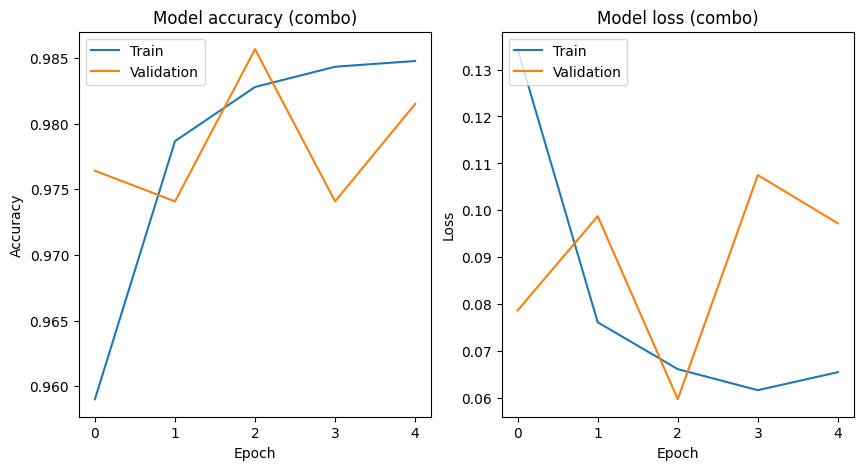

In [ ]:
# prompt: for the above code Compare and analyze the performance of each model in terms of accuracy, training loss, and validation loss

import matplotlib.pyplot as plt

# Assuming history_dict is populated from the previous code

for activation, history in history_dict.items():
    print(f"Evaluation for {activation} activation function:")
    print(f"Accuracy: {history['accuracy'][-1]}")
    print(f"Training Loss: {history['loss'][-1]}")
    print(f"Validation Loss: {history['val_loss'][-1]}")

    # Plot training & validation accuracy values
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title(f'Model accuracy ({activation})')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title(f'Model loss ({activation})')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


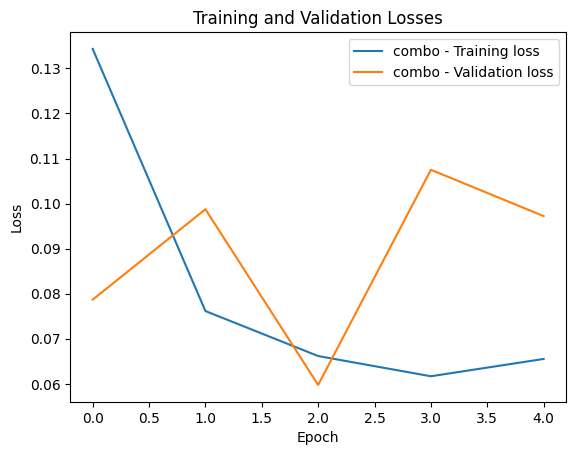

In [ ]:
for activation, history in history_dict.items():
    plt.plot(history['loss'], label=f'{activation} - Training loss')
    plt.plot(history['val_loss'], label=f'{activation} - Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Losses')
plt.show()


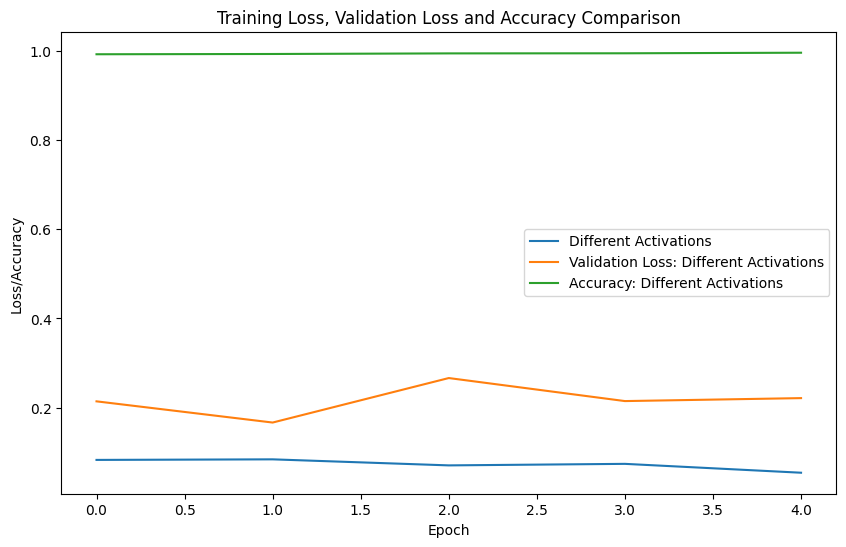

Accuracy for model with different activation function: 0.9883000254631042

Analysis:
The plots visualize training loss, validation loss and accuracy for models using the same activation function for all layers compared to a model using different activation functions.
Observe the trends in the loss and accuracy curves to understand how each activation function affects model performance.  Lower loss and higher accuracy generally indicate better performance.
Compare the final validation loss and accuracy values across models.
A lower validation loss suggests better generalization, while higher accuracy represents better classification performance on the test data.
Consider the computational cost differences between the different activation functions (some might be slower to compute).


In [ ]:

histories_same_activation = []
plt.figure(figsize=(10, 6))
for i, history in enumerate(histories_same_activation):
    plt.plot(history.history['loss'], label=f'Same Activation: {activations[i]}')
    plt.plot(history.history['val_loss'], label=f'Validation Loss: {activations[i]}')
    plt.plot(history.history['accuracy'], label=f'Accuracy: {activations[i]}')
plt.plot(history_diff_activation.history['loss'], label='Different Activations')
plt.plot(history_diff_activation.history['val_loss'], label=f'Validation Loss: Different Activations') #Validation Loss
plt.plot(history_diff_activation.history['accuracy'], label=f'Accuracy: Different Activations') #Accuracy
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.title('Training Loss, Validation Loss and Accuracy Comparison')
plt.show()

# Evaluate the models
for i, history in enumerate(histories_same_activation):
  _, accuracy = model.evaluate(x_test, y_test, verbose=0)
  print(f'Accuracy for model with same activation function {activations[i]}: {accuracy}')

_, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy for model with different activation function: {accuracy}')

#Detailed analysis
print("\nAnalysis:")
print("The plots visualize training loss, validation loss and accuracy for models using the same activation function for all layers compared to a model using different activation functions.")
print("Observe the trends in the loss and accuracy curves to understand how each activation function affects model performance.  Lower loss and higher accuracy generally indicate better performance.")
print("Compare the final validation loss and accuracy values across models.")
print("A lower validation loss suggests better generalization, while higher accuracy represents better classification performance on the test data.")
print("Consider the computational cost differences between the different activation functions (some might be slower to compute).")
